# <font color='green'>**Business Case: Yulu - Hypothesis Testing**</font>

## **About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## **Business Problem**

The company wants to know:

* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands

**Column Profiling:**

* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
   1. Clear, Few clouds, partly cloudy, partly cloudy
   2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

## **Approach to solve the problem and find a solution**

We will use the followings steps and Hypothesis testing methods to arrive at the solution.

* Bi-Variate Analysis
* 2-sample t-test: testing for difference across populations
* ANNOVA
* Chi-square

We will further follow the below steps

* We will try to establish a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)
* Select an appropriate test to check whether:
     * Working Day has effect on number of electric cycles rented
     * No. of cycles rented similar or different in different seasons
     * No. of cycles rented similar or different in different weather
     * Weather is dependent on season (check between 2 predictor variable)
* Set up Null Hypothesis (H0)
* State the alternate hypothesis (H1)
* Check assumptions of the test (Normality, Equal Variance) using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test.
* Set a significance level (alpha)
* Calculate test Statistics.
* Decision to accept or reject null hypothesis.
* We will collect the inference from the analysis

# **1. Importing dataset and libraries**

In [ ]:
!gdown 1-vIBOOsANePppsk242PmQJQERzjFozEq

Downloading...
From: https://drive.google.com/uc?id=1-vIBOOsANePppsk242PmQJQERzjFozEq
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 23.6MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## <font color='green'>Loading the dataset

In [ ]:
data=pd.read_csv('bike_sharing.csv')

## <font color='green'>Dispalying the sample dataset

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## <font color='green'>Understanding the data


In [ ]:
print("Structure of the data")
print("------------------------------------------------------")
print(data.info())

Structure of the data
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [ ]:
print(f"Total rows: {data.shape[0]} \nTotal columns: {data.shape[1]}")

Total rows: 10886 
Total columns: 12


In [ ]:
print("Null Values in each column")
print("------------------------------------------------------")
print(data.isnull().sum())

Null Values in each column
------------------------------------------------------
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


As there are no missing values, there is no need of handling missing data

In [ ]:
if np.any(data.duplicated())==False:
  dup="No Duplicate records"
else:
  dup=data.duplicated().sum()
print("Duplicate records")
print("------------------------------------------------------")
print(dup)

Duplicate records
------------------------------------------------------
No Duplicate records


In [ ]:
cat_columns=data.select_dtypes(include='object').columns.values
num_columns=data.select_dtypes(exclude='object').columns.values
print("Categorical columns")
print("------------------------------------------------------")
print(cat_columns)

print("\n")
print("Numerical columns")
print("------------------------------------------------------")
print(num_columns)


Categorical columns
------------------------------------------------------
['datetime']


Numerical columns
------------------------------------------------------
['season' 'holiday' 'workingday' 'weather' 'temp' 'atemp' 'humidity'
 'windspeed' 'casual' 'registered' 'count']


**Observing the data and from the information we have about the dataet**
* **datetime** - we need to be convert to date type.
* **season** - we need to replace the numbers with corresponding season names and change type to category.
* **holiday** - we need to replace the values 0 and 1 with "yes" and "no" and change type to category.
* **workingday** - we need to replace the values 0 and 1 with "yes" and "no" and change type to category.
* **weather** - As each value has many weather types, we will not replace the values but will change type to category.


In [ ]:
# Converting datetime column into date time format
data['datetime']=pd.to_datetime(data['datetime'])

In [ ]:
# Creating new columns from datetime and converting them to categories
data['year']=data['datetime'].dt.year
data['month']=data['datetime'].dt.month
data['day']=data['datetime'].dt.day
data['hour']=data['datetime'].dt.hour

In [ ]:
# replacing the numeric values with corresponding values
data['season']=data['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'})
data["weather"] = data["weather"].replace({1: "Clear", 2: "Partly Cloudy", 3: "Rain", 4: "Heavy Rain"})
data['holiday']=data['holiday'].replace({0:'no',1:'yes'})
data['workingday']=data['workingday'].replace({0:'no',1:'yes'})
# change of month
data['month'] = data['month'].replace({1: 'January',
                                   2: 'February',
                                   3: 'March',
                                   4: 'April',
                                   5: 'May',
                                   6: 'June',
                                   7: 'July',
                                   8: 'August',
                                   9: 'September',
                                   10: 'October',
                                   11: 'November',
                                   12: 'December'})

In [ ]:
# converting below columns to category type
cols= ['season','holiday','workingday','weather']
for col in cols:
  data[col]=data[col].astype('category')

In [ ]:
print("Structure of the data after corrections")
print("------------------------------------------------------")
print(data.info())
print("\n\n")
cat_columns=data.select_dtypes(include='category').columns.values
num_columns=data.select_dtypes(exclude='category').columns.values
print("Categorical columns")
print("------------------------------------------------------")
print(cat_columns)

print("\n")
print("Numerical columns")
print("------------------------------------------------------")
print(num_columns)


Structure of the data after corrections
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  object        
 14  day         10886 non-n

## <font color='green'>Statistical Summary

In [ ]:
print("Summary of the dataset for numeric columns")
print("------------------------------------------------------")
data.describe()

Summary of the dataset for numeric columns
------------------------------------------------------


,datetime,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,9.992559,11.541613
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,5.000000,6.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,10.000000,12.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,15.000000,18.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,19.000000,23.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,5.476608,6.915838


**Insights from the numeric columns summary**

* The dataset has records for almost 2 years starting from 01st Jan 2011 till 19 Dec 2012
* Average temperature is 20.23°C and varies from 0.82°C (very cold) to 41°C (hot summer days).There is a good variation in temperature, implying the dataset captures all seasons — winters to peak summers.
* average feels-like temperature(atemp) is 23.65°C, slightly higher than temp due to humidity/wind effects.
* Mean humidity is around 62%. It ranges from 0% (extremely dry) to 100% (fully saturated air). Standard deviation is 19.25, suggesting noticeable fluctuation in humidity levels. Insight: Dataset covers both dry and humid conditions, typical of seasonal changes.
* Average windspeed is 12.8 km/h.It ranges from 0 (no wind) to 56.99 km/h (very windy conditions). Standard deviation of 8.16 indicates moderate variability.
* Average casual users is 36 whereas average registered users is 155 meaning people are regular or subscription-based users rather than occasional riders.
* Year spans 2011 and 2012.
* Month is spread across 1 (Jan) to 12 (Dec), confirming data for the whole two years. Mean Month: 6.52 (June/July), indicating summer peak but to be confirmed with further analysis.
* Days range from 1 to 19 — looks odd because usually, it should be 1 to 31.
* Hour covers 0 (midnight) to 23 (11 PM), complete 24-hour cycle.
75th percentile is 18(06:00 PM) showing evening rush hour demand.



In [ ]:
print("Summary of the dataset for categorical columns")
print("------------------------------------------------------")
data.describe(include='category')

Summary of the dataset for categorical columns
------------------------------------------------------


,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,winter,no,yes,Clear
freq,2734,10575,7412,7192


In [ ]:
10575/10886

0.9714311960316002

In [ ]:
for cols in cat_columns:
  print(f"Unique values in {cols}")
  print("------------------------------------------------------")
  print(data[cols].unique())
  print("\n")

Unique values in season
------------------------------------------------------
['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['fall', 'spring', 'summer', 'winter']


Unique values in holiday
------------------------------------------------------
['no', 'yes']
Categories (2, object): ['no', 'yes']


Unique values in workingday
------------------------------------------------------
['no', 'yes']
Categories (2, object): ['no', 'yes']


Unique values in weather
------------------------------------------------------
['Clear', 'Partly Cloudy', 'Rain', 'Heavy Rain']
Categories (4, object): ['Clear', 'Partly Cloudy', 'Rain', 'Heavy Rain']




**Insights from the categorical columns summary**

* **Season** - Winter has slightly more data; seasonal impact should be checked.
* **Holidays** - Non-holidays are domainting the dataset with 10575 records which is 97% of total records.
* **Workingday** - With 7412 records, most rides happen on working days (~68%), suggesting commuting usage.
* **Weather** - Most rides(~66%) happen when weather is clear, Few clouds, partly cloudy or partly cloudy which says bad weather conditions affect the rides.



# **2. Outliers detection**

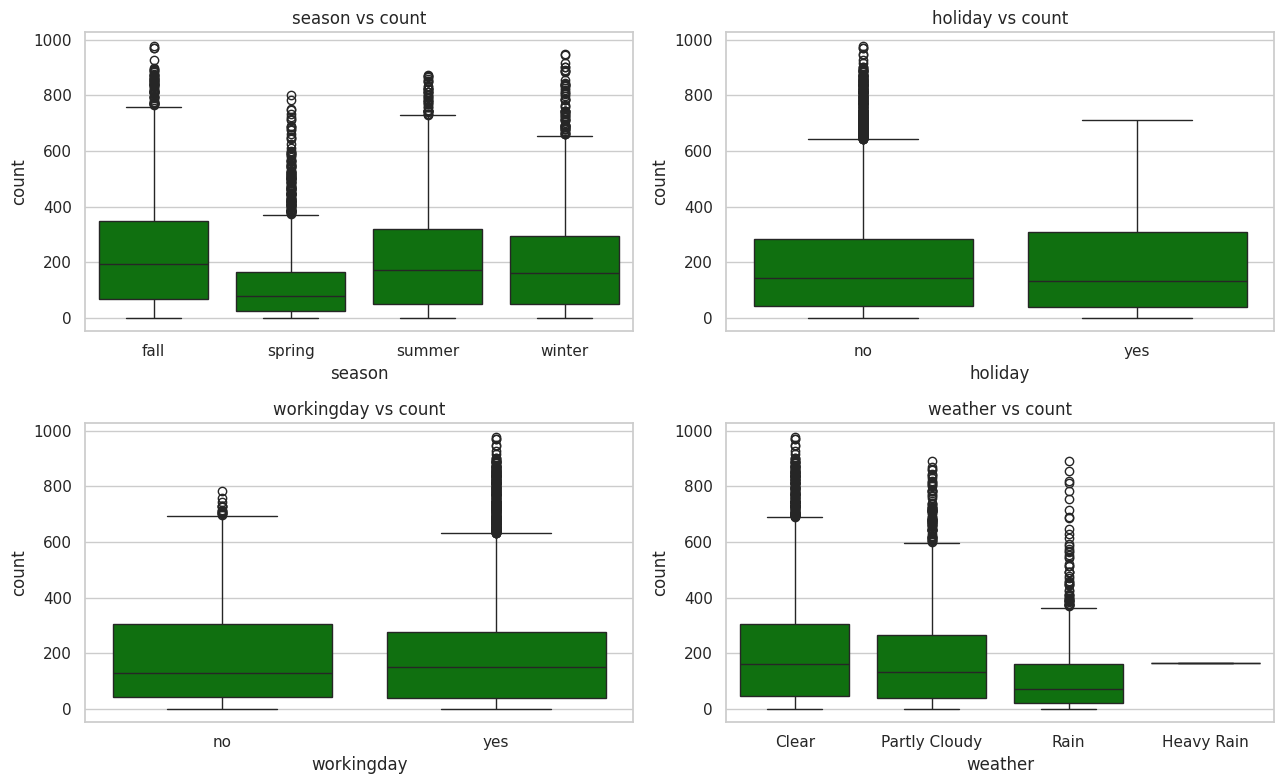

In [ ]:
plt.figure(figsize=(13,8))
sns.set_style('whitegrid')

for i,cols in enumerate(cat_columns,1):
  plt.subplot(2,2,i)
  sns.boxplot(data=data,x=cols, y='count',color='green')
  plt.title(f'{cols} vs count')
plt.tight_layout()
plt.show()

**Outlier Analysis**

**Outliers in Different Seasons:**

In spring and winter, there are more unusual values in the data compared to other seasons.

**Weather Outliers:**

Rainy weather has a lot of unusual values, while heavy rain weather doesn't have any.


**Working Days vs. Holidays:**

On regular working days, there are more unusual values in the data than on holidays. This suggests some unexpected patterns during typical workdays that might need a closer look.

# **3. Univariate Analysis**

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,spring,no,no,Clear,9.84,14.395,81,0.0,3,13,16,2011,January,1,0
1,2011-01-01 01:00:00,spring,no,no,Clear,9.02,13.635,80,0.0,8,32,40,2011,January,1,1
2,2011-01-01 02:00:00,spring,no,no,Clear,9.02,13.635,80,0.0,5,27,32,2011,January,1,2
3,2011-01-01 03:00:00,spring,no,no,Clear,9.84,14.395,75,0.0,3,10,13,2011,January,1,3
4,2011-01-01 04:00:00,spring,no,no,Clear,9.84,14.395,75,0.0,0,1,1,2011,January,1,4


In [ ]:
# Season counts
data['season'].value_counts()

,count
season,
winter,2734
fall,2733
summer,2733
spring,2686


In [ ]:
# holiday counts
data['holiday'].value_counts()

,count
holiday,
no,10575
yes,311


In [ ]:
# workingday counts
data['workingday'].value_counts()

,count
workingday,
yes,7412
no,3474


In [ ]:
# weather counts
data['weather'].value_counts()

,count
weather,
Clear,7192
Partly Cloudy,2834
Rain,859
Heavy Rain,1


In [ ]:
# year counts
data['year'].value_counts()

,count
year,
2012,5464
2011,5422


In [ ]:
# month counts
data['month'].value_counts()

,count
month,
August,912
July,912
June,912
May,912
December,912
October,911
November,911
April,909
September,909


In [ ]:
# day counts
data['day'].value_counts().sort_index()

,count
day,
1,575
2,573
3,573
4,574
5,575
6,572
7,574
8,574
9,575


In [ ]:
# hour counts
data['hour'].value_counts().sort_index()

,count
hour,
0,455
1,454
2,448
3,433
4,442
5,452
6,455
7,455
8,455


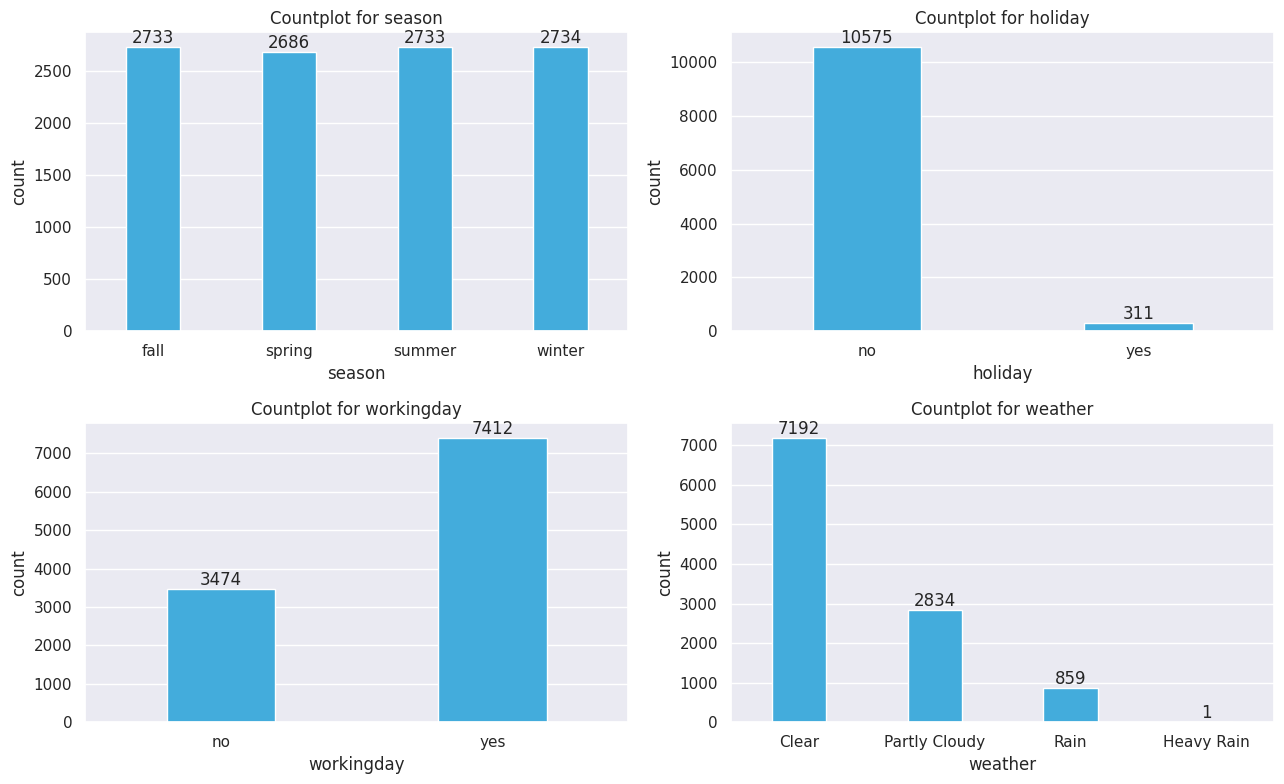

In [ ]:
# countplot on categories

plt.figure(figsize=(13, 8))
sns.set(style="darkgrid")

for i, column in enumerate(cat_columns, 1):
    plt.subplot(2, 2, i)
    ax=sns.countplot(x=column, data=data, color="#29B6F6", width=0.4)
    for container in ax.containers:
      ax.bar_label(container, label_type='edge')
    plt.title(f'Countplot for {column}')

plt.tight_layout()
plt.show()

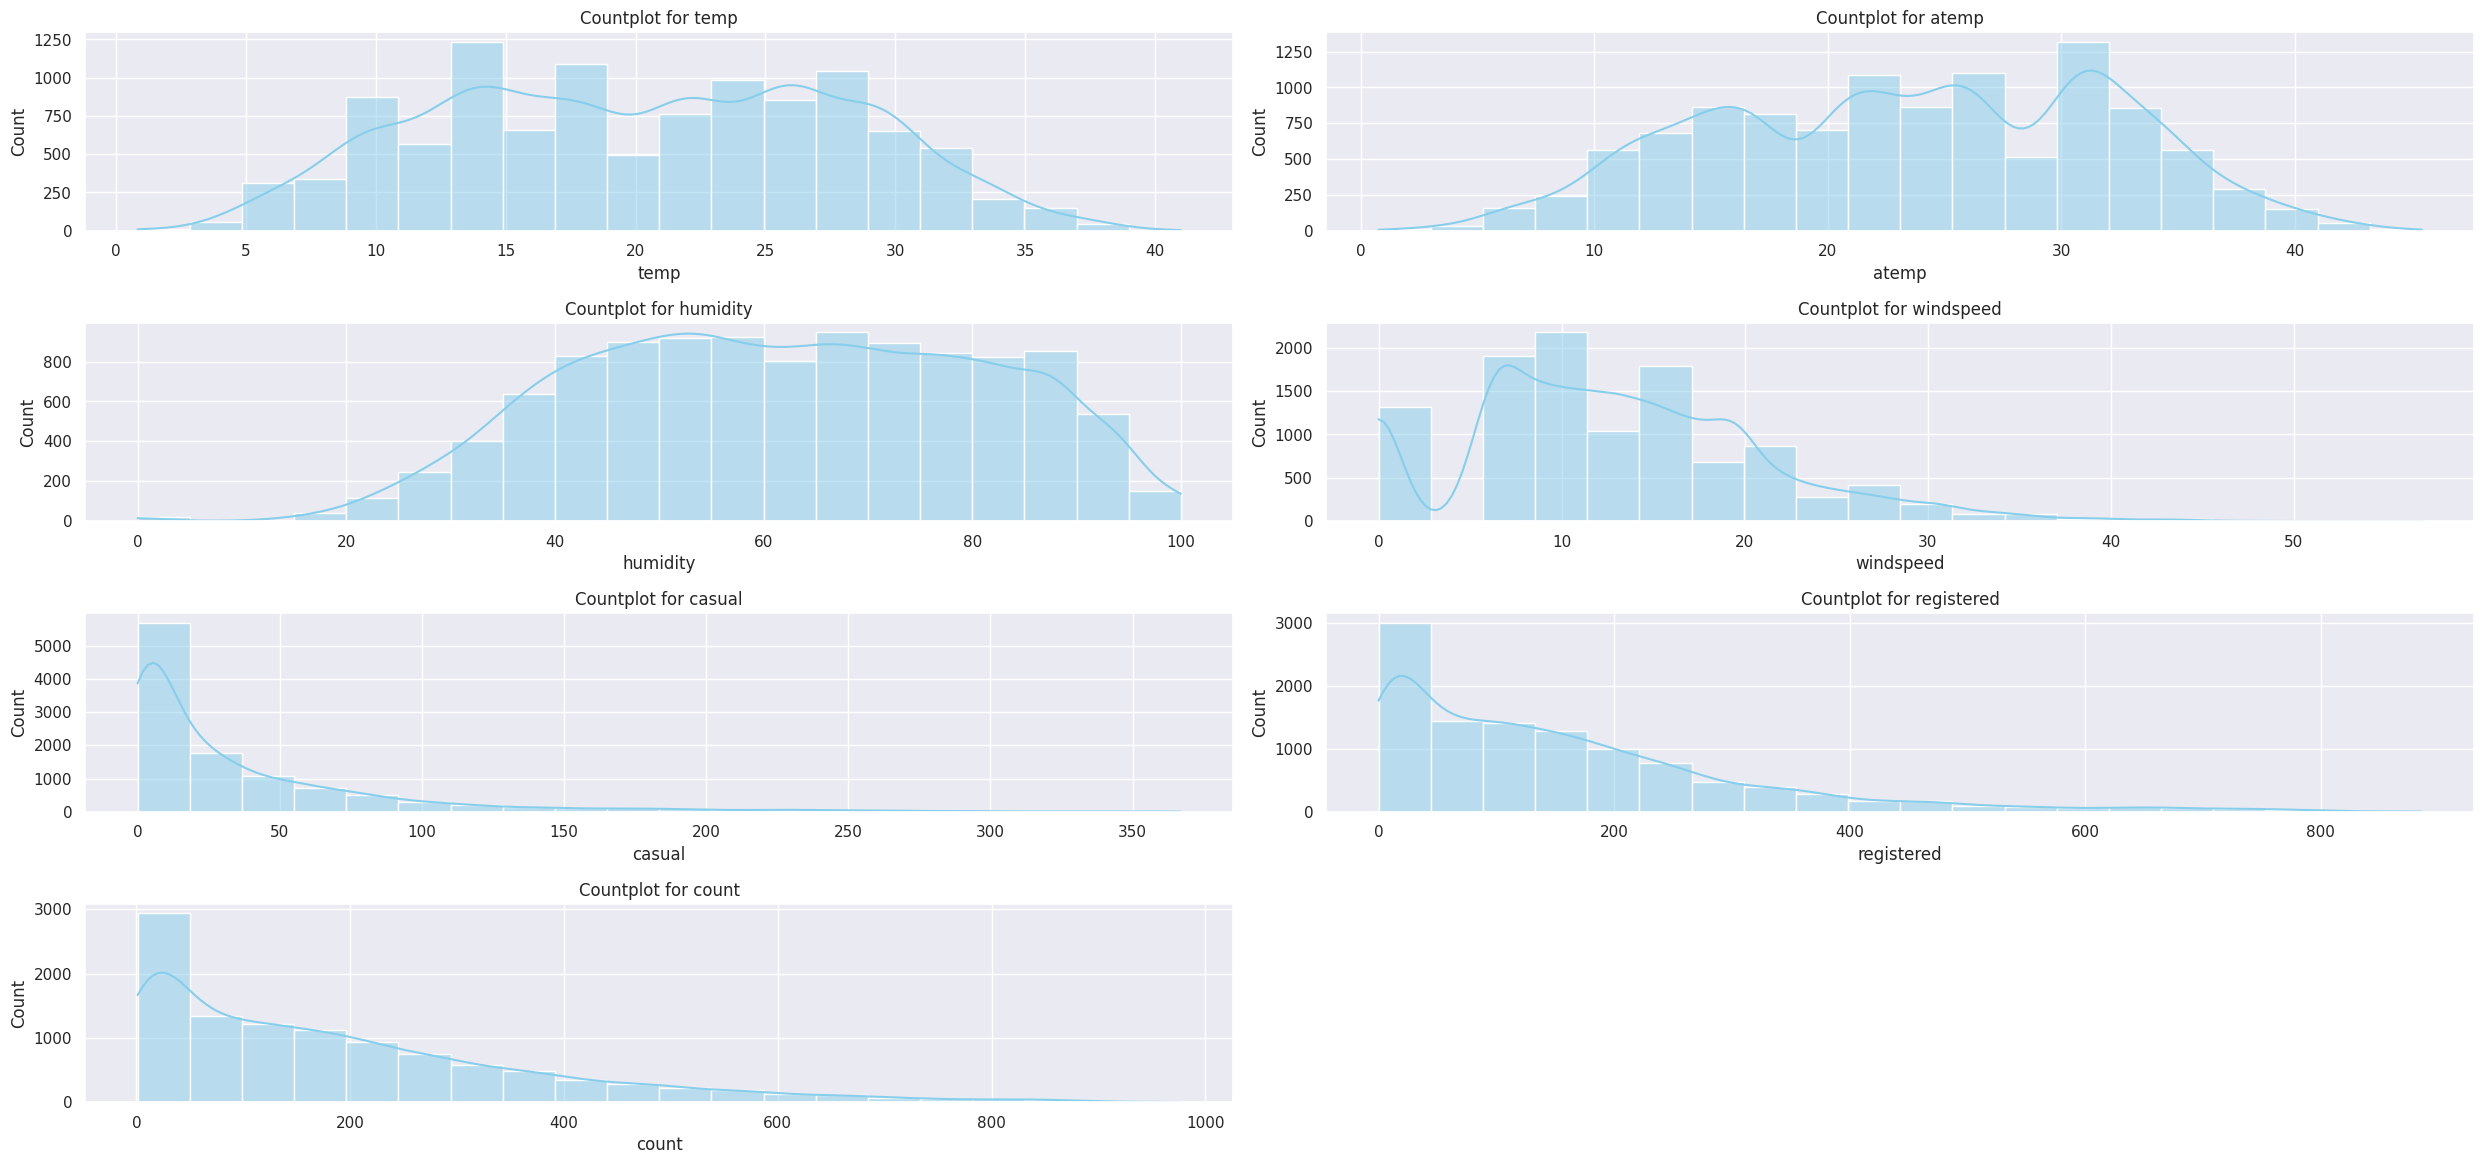

In [ ]:
# boxplot on categories
num_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
plt.figure(figsize=(25, 20))
sns.set(style="darkgrid")

for i, column in enumerate(num_col, 1):
    plt.subplot(7, 2, i)
    sns.histplot(data[column], bins=20, kde=True, color='skyblue')
    plt.title(f'Countplot for {column}')

plt.tight_layout()
plt.show()

**Numerical column analysis**

**Temp:**
- The 'temp' column shows a diverse temperature range (0.82 to 41.0), with a median of 20.5 and moderate variability around the mean of approximately 20.23 degrees Celsius.

**Atemp**
- The 'atemp' column displays a wide range of apparent temperatures (0.76 to 45.455), with a mean of approximately 23.66 and moderate variability around the median of 24.24.

**Humidity**
- The 'humidity' column depicts a range of humidity values (0 to 100), with an average around 61.89. The distribution shows moderate variability, from 47 at the 25th percentile to 77 at the 75th percentile, indicating diverse humidity levels in the dataset.

**WindSpeed**
- The 'windspeed' column displays a range of wind speeds from 0 to 56.9979, with a mean of approximately 12.80.

**Casual**
- The 'casual' column demonstrates a broad range of casual bike rental counts, with values spanning from 0 to 367. The distribution is positively skewed, as indicated by the mean (36.02) being less than the median (17.0).

**Registered**
- The 'registered' column showcases a diverse range of registered bike rental counts, ranging from 0 to 886. The distribution is positively skewed, evidenced by the mean (155.55) being less than the median (118.0).

**Count**
- The 'count' column reveals a wide range of total bike rental counts, varying from 1 to 977. The distribution is positively skewed, with a mean (191.57) greater than the median (145.0), indicating a concentration of lower values

# **4. Bivariate Analysis**

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,spring,no,no,Clear,9.84,14.395,81,0.0,3,13,16,2011,January,1,0
1,2011-01-01 01:00:00,spring,no,no,Clear,9.02,13.635,80,0.0,8,32,40,2011,January,1,1
2,2011-01-01 02:00:00,spring,no,no,Clear,9.02,13.635,80,0.0,5,27,32,2011,January,1,2
3,2011-01-01 03:00:00,spring,no,no,Clear,9.84,14.395,75,0.0,3,10,13,2011,January,1,3
4,2011-01-01 04:00:00,spring,no,no,Clear,9.84,14.395,75,0.0,0,1,1,2011,January,1,4


In [ ]:
cat_columns

array(['season', 'holiday', 'workingday', 'weather'], dtype=object)

In [ ]:
data.groupby('season')['count'].count().sort_values(ascending=False)

,count
season,
winter,2734
fall,2733
summer,2733
spring,2686


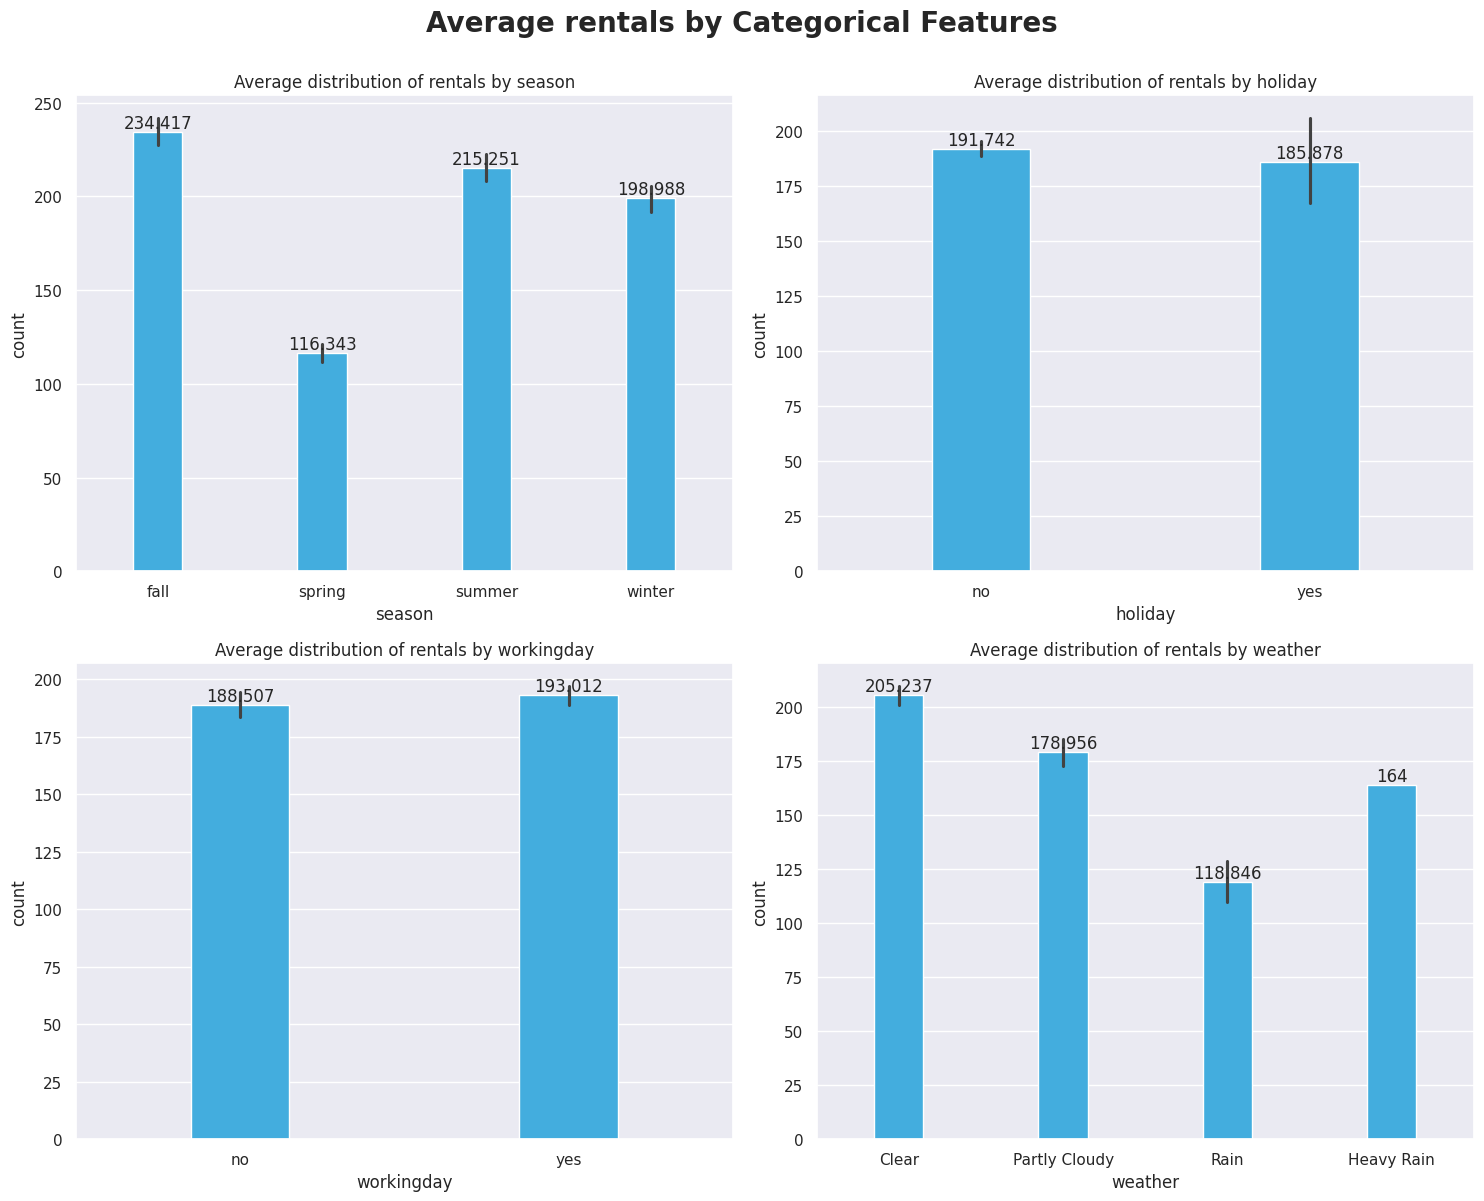

In [ ]:
# barplot of categories

plt.figure(figsize=(15, 12))
sns.set(style="darkgrid")
plt.suptitle('Average rentals by Categorical Features', fontsize=20, y=1,fontweight="bold")
for i, column in enumerate(cat_columns,1):
    plt.subplot(2, 2, i)
    ax=sns.barplot(x=column, y='count', data=data, color="#29B6F8", width = 0.3)
    for container in ax.containers:
      ax.bar_label(container, label_type='edge')
    plt.title(f'Average distribution of rentals by {column}')

# plt.tight_layout(rect=[0, 0, 1, 0.88])
plt.tight_layout()
plt.show()

**Insighst**

**1. Average Rentals by Season**
Highest Rentals: Fall

Second Highest: Summer

Third Highest : Winter

Lowest Rentals: Spring

Insight: Rentals peak in the fall and summer, likely due to favorable weather and vacation season. Spring has the lowest demand, possibly due to transitional or rainy weather in some regions.

**2. Average Rentals by Holiday**

 There's a slight drop in rentals on holidays, possibly because fewer people commute or go out during holidays.

**3. Average Rentals by Working Day**

Rentals are slightly higher on working days, indicating usage for commuting or weekday activities.

**4. Average Rentals by Weather**

Clear Weather: Highest

Partly Cloudy: Second Highest

Heavy Rain: Lowest

As expected, bad weather significantly reduces rentals. Clear days see the most rentals, while rain — especially heavy rain — drastically reduces demand.

**Overall Summary:**
Best Conditions for High Rentals: Fall season, clear weather, non-holiday working days.

Most Impactful Factor: Weather appears to have the strongest influence on rental counts.

Minor Factors: Holidays and working days show only small differences.

**Final Observations:**

Strongest influence: Weather, especially rain, has a huge impact on rentals.

Fall is the best season for rentals, followed by Summer.

Holidays and working days have only minor effects.

In [ ]:
correlation_matrix = data[num_col].corr()

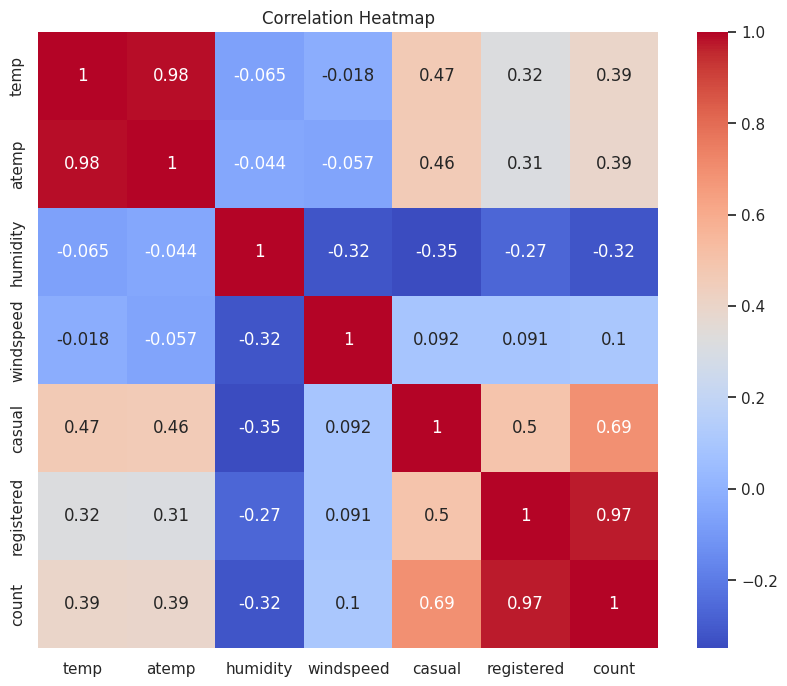

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Correlation Analysis**

**Atemp:**

- Strong positive correlation with 'temp' (0.98), indicating a close relationship.
- Moderate positive correlation with 'casual' (0.46) and 'registered' (0.31).
- Positive correlation with 'count' (0.39), suggesting a relationship with overall bike rentals.

**Temp (Temperature):**

- Highly correlated with 'atemp' (0.98), indicating a strong connection.
- Moderate positive correlation with 'casual' (0.47) and 'registered' (0.32).
- Positive correlation with 'count' (0.39), showing a relationship with overall bike rentals.

**Humidity:**

- Weak negative correlation with 'atemp' (-0.04) and 'temp' (-0.06).
- Moderate negative correlation with 'casual' (-0.35), 'registered' (-0.27), and 'count' (-0.32).
- Indicates a tendency for fewer bike rentals during higher humidity.

**Windspeed:**

- Weak negative correlation with 'atemp' (-0.06) and 'temp' (-0.02).
- Weak positive correlation with 'casual' (0.09), 'registered' (0.09), and 'count' (0.10).
- Suggests a subtle influence on bike rentals with increasing wind speed.

**Casual (Casual Bike Rentals):**

- Strong positive correlation with 'atemp' (0.46) and 'temp' (0.47).
- Moderate negative correlation with 'humidity' (-0.35) and positive correlation with 'windspeed' (0.09).
- Highly correlated with 'registered' (0.50) and 'count' (0.69), indicating a significant impact on overall rentals.

**Registered (Registered Bike Rentals):**

- Positive correlation with 'atemp' (0.31) and 'temp' (0.32).
- Negative correlation with 'humidity' (-0.27) and positive correlation with 'windspeed' (0.09).
- Highly correlated with 'casual' (0.50) and 'count' (0.97), emphasizing a substantial impact on overall rentals.

**Count (Total Bike Rentals):**

- Positive correlation with 'atemp' (0.39), 'temp' (0.39), and 'casual' (0.69).
- Negative correlation with 'humidity' (-0.32).
- Highly correlated with 'registered' (0.97), emphasizing the joint impact of casual and registered rentals on the overall count.

In [ ]:
# counts based on months

monthly_count = data.groupby('month')['count'].sum().reset_index()

monthly_count = monthly_count.sort_values(by='count', ascending=False)

monthly_count


,month,count
6,June,220733
5,July,214617
1,August,213516
11,September,212529
10,October,207434
8,May,200147
9,November,176440
0,April,167402
2,December,160160
7,March,133501


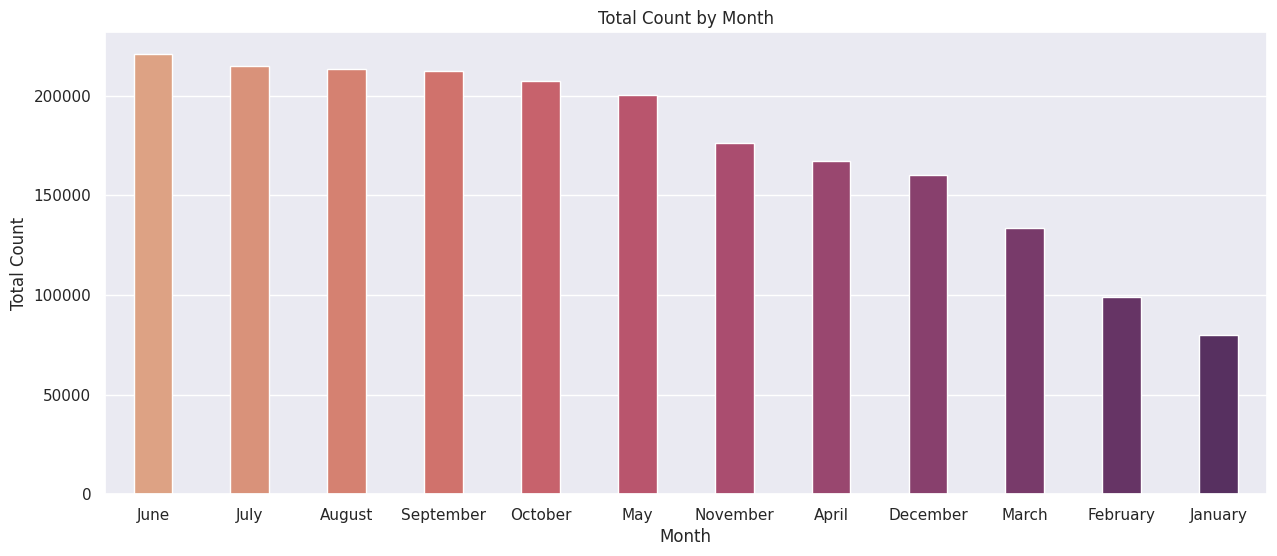

In [ ]:

# rentals on monthly counts

plt.figure(figsize=(15, 6))
sns.barplot(x='month', y='count', data=monthly_count, order=monthly_count['month'], palette='flare', width = 0.4)

plt.title('Total Count by Month')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.show()


**Monthly analysis on rentals**

**Peak Rental Months:**
- June stands out as the peak month for bike rentals, with the highest count of 220,733, followed closely by July and August.

**Seasonal Trend:**
- Summer months (June, July, August) show higher bike rental counts, consistent with favorable weather conditions.

**Off-Peak Rental Months:**
- January, February, and March have notably lower bike rental counts, indicating potential off-peak periods, possibly influenced by colder weather or fewer outdoor activities.

# **5. Hypothesis Testing**

## Demand of bicycles on rent is the same on Weekdays & Weekends
Since we have two independent saples, we can go with Two Sample Independent T-Test.



Since we have two independent saples, we can go with Two Sample Independent T-Test.

**Assumptions of Two Sample Independent T-Test :**

- **The data should be normall distributed**<br><br>

- **variances of the two groups are equal**

**Let the Confidence interval be 95%, so siginificance (alpha) is 0.05**

## To check if the data is normal, we will go with Wilkin-ShapiroTest.

**The test hypothesis for the Wilkin-Shapiro test are:**

- **Ho: Data is normally distributed**<br><br>

- **Ha: Data is not normally distributed.**

In [ ]:
from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot

np.random.seed(41)

df_subset = data.sample(100)["count"]

test_stat, p_val = shapiro(df_subset)

p_val

np.float64(2.6341210395843134e-07)

Hence the p_values is lesser than the significance level, Null hypothesis can be rejected.

**Therefore, the Data is not normally distributed.**

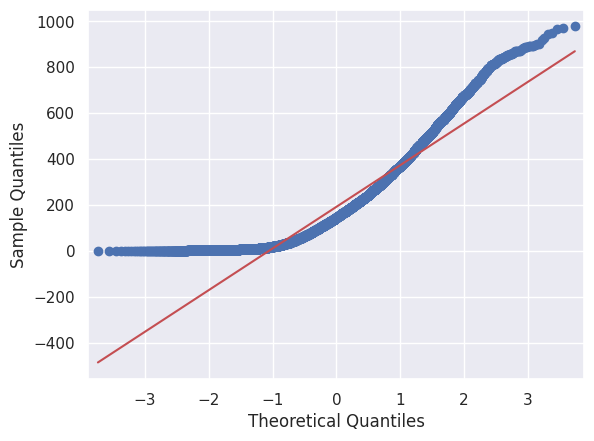

In [ ]:
# QQ plot

qqplot(data['count'], line = 's')
plt.show()


## To check if the variances of two groups are equal. We will perform Levene's test


**The Test hypotheses for Levene's test are:**

**Ho: The variances are equal.**


**Ha: The variances are not equal.**

In [ ]:
working_day = data[data['workingday'] == 'yes']['count']

holiday = data[data['workingday'] == 'no']['count']

levene_stat, p_val = levene(working_day, holiday)

p_val


np.float64(0.9437823280916695)

<Axes: xlabel='count', ylabel='Density'>

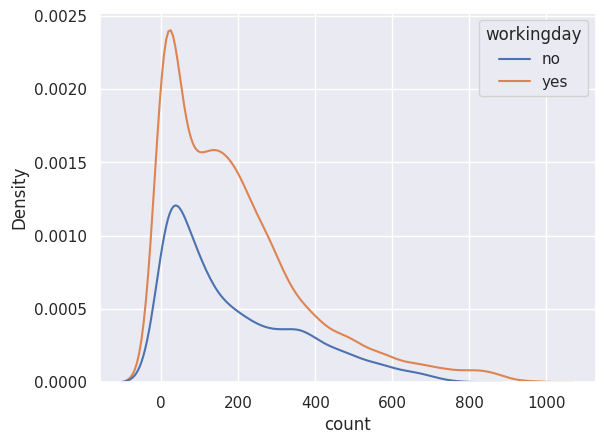

In [ ]:
sns.kdeplot(data = data, x = 'count', hue = 'workingday')


<Axes: xlabel='count', ylabel='Count'>

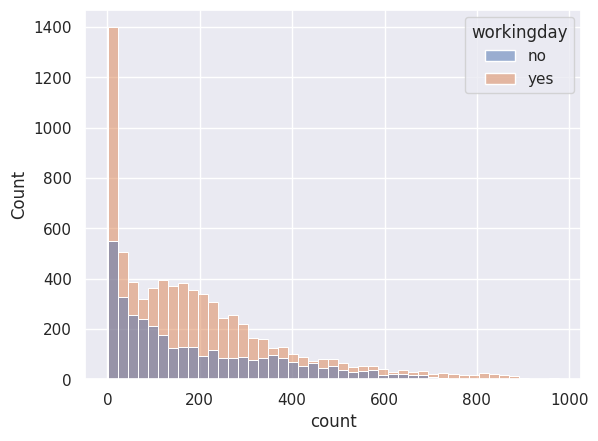

In [ ]:
sns.histplot(data = data, x = 'count', hue = 'workingday')


Hence the p_values is greater than the significance level, Null hypothesis can be accepted.

**Therefore, the variances are approximately equal.**

Despite the data is not normally distributed according to both the Wilkin-ShapiroTest and qq-plot<br><br>
It is important to highlight that the variances between the two groups are equal**<br><br>
**So we can proceed with the Two Sample Independent T-Test.**

**The hypothesis for the t-test are:**

- **Ho: There is no significant difference between working and non-working days.**<br><br>

- **Ha: There is a significant difference between working and non-working days.**

In [ ]:
ttest_stat, p_val = ttest_ind(working_day, holiday)

p_val


np.float64(0.22644804226361348)

Hence the p_values is greater than the significance level, Null hypothesis can be accepted.

**Therefore, There is no significant difference on bike rentals between working and non-working days.**

In [ ]:
kruskal_stat, p_val = kruskal(working_day, holiday)

p_val

np.float64(0.9679113872727798)

Hence the p_values is greater than the significance level, Null hypothesis can be accepted.

**Therefore, There is no significant difference on bike rentals between working and non-working days.**

### Demand of bicycles on rent is the same for different Weather conditions

Since we have more than two categories now, so will use ANOVA here.

**Assumptions for ANOVA are:**

1. The population data should be normally distributed- The data is not normal as verified by **Wilkin-Shapiro test and the qqplot.**<br><br>

2. The data points must be independent- This condition is satisfied.<br><br>

3. Approximately equal variance within groups- This will be verified using **Levene's test.**

In [ ]:
# skewness of weather

data.groupby('weather')['count'].skew()

,count
weather,
Clear,1.139857
Partly Cloudy,1.294444
Rain,2.187137
Heavy Rain,NaN


In [ ]:
# kurtosis test of weather

data.groupby('weather')['count'].apply(lambda x: x.kurtosis())

,count
weather,
Clear,0.964720
Partly Cloudy,1.588430
Rain,6.003054
Heavy Rain,NaN


<Axes: xlabel='count', ylabel='Density'>

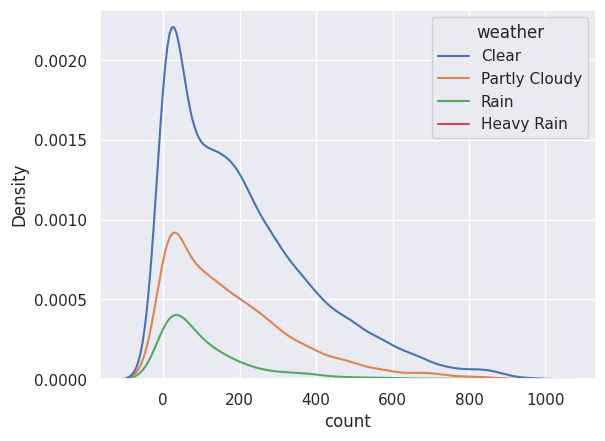

In [ ]:
sns.kdeplot(data = data, x = 'count', hue = 'weather')

<Axes: xlabel='count', ylabel='Count'>

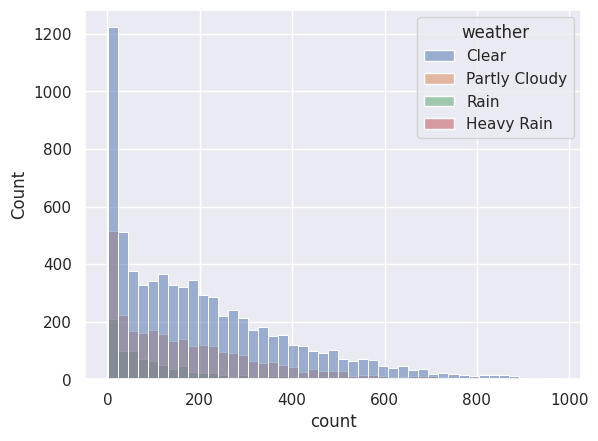

In [ ]:
sns.histplot(data = data, x = 'count', hue = 'weather')

**The Test hypothesis for Levene's test are:**

- **Ho: The variances are equal.**

- **Ha: The variances are not equal.**

In [ ]:
weather1 = data[data['weather'] == "Clear"]['count']
weather2 = data[data['weather'] == "Partly Cloudy"]['count']
weather3 = data[data['weather'] == "Rain"]['count']
weather4 = data[data['weather'] == "Heavy Rain"]['count']

levene_stat, p_val = levene(weather1, weather2, weather3,weather4)

p_val

np.float64(3.504937946833238e-35)

Hence the p_values is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, the variances are not equal.**

Two of the three conditions of ANOVA are not met, **We will still perform ANOVA**.

Then We will also perform **Kruskal's test and compare the results**.

In case of any discrepancies, Kruskal's test results will be considered, since data does not met conditions of ANOVA.

**The hypothesis for ANOVA are:**

- **Ho: There is no significant difference between demand of bicycles for different Weather conditions.**<br><br>

- **Ha: There is a significant difference between demand of bicycles for different Weather conditions.**

In [ ]:
anova_stat, p_val = f_oneway(weather1, weather2, weather3,weather4)

p_val

np.float64(5.482069475935669e-42)

Hence the p_values is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, There is a significant difference between demand of bicycles for different Weather conditions.**

## Kruskal Test on weather

In [ ]:
kruskal_stat, p_val = kruskal(weather1, weather2, weather3,weather4)

p_val

np.float64(3.501611300708679e-44)

Again the p_values is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, we can conclude that there is a significant difference between demand of bicycles for different Weather conditions.**

## Demand of bicycles on rent is the same for different Seasons

Here also we have more than two categories now, so will use ANOVA here.

**Assumptions for ANOVA are:**

1. The population data should be normally distributed- The data is not normal as verified by **Wilkin-Shapiro test and the qqplot.**<br><br>

2. The data points must be independent- This condition is satisfied.<br><br>

3. Approximately equal variance within groups- This will be verified using **Levene's test.**

In [ ]:
# skewness of seasons

data.groupby('season')['count'].skew()

,count
season,
fall,0.991495
spring,1.888056
summer,1.003264
winter,1.172117


In [ ]:
# kurtosis test of seasons

data.groupby('weather')['count'].apply(lambda x: x.kurtosis())

,count
weather,
1,0.964720
2,1.588430
3,6.003054
4,NaN


<Axes: xlabel='count', ylabel='Density'>

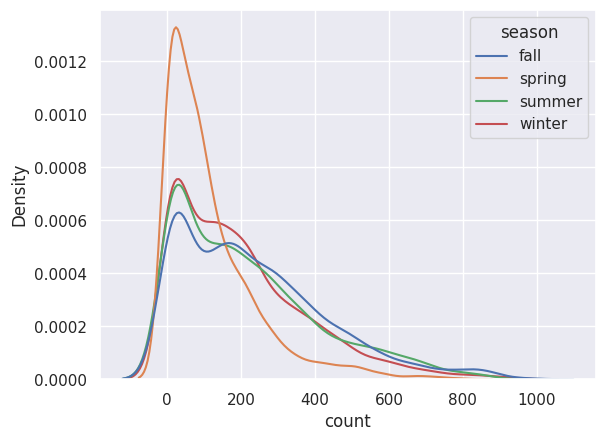

In [ ]:
sns.kdeplot(data = data, x = 'count', hue = 'season')

<Axes: xlabel='count', ylabel='Count'>

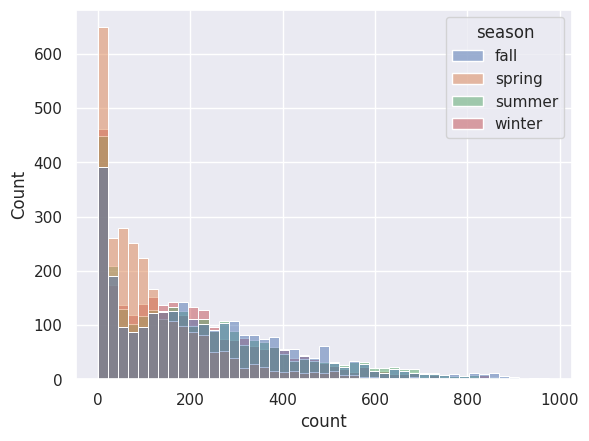

In [ ]:
sns.histplot(data = data, x = 'count', hue = 'season')

**The Test hypothesis for Levene's test are:**

- **Ho: The variances are equal.**<br><br>

- **Ha: The variances are not equal.**

In [ ]:
spring = data[data['season'] == 'spring']['count']
summer = data[data['season'] == 'summer']['count']
fall = data[data['season'] == 'fall']['count']
winter = data[data['season'] == 'winter']['count']

levene_stat, p_val = levene(spring,summer,fall,winter)

p_val

np.float64(1.0147116860043298e-118)

Hence the p_values is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, the variances are not equal.**

As like before, we still use both ANOVA and Kruskal's test, comparing the results.

If discrepancies arise, we'll rely on **Kruskal's test**, Since data does not met the conditions for ANOVA.

**The hypothesis for ANOVA are:**

- **Ho: There is no significant difference between demand of bicycles for different Seasons.**<br><br>

- **Ha: There is a significant difference between demand of bicycles for different Seasons.**

In [ ]:
anova_stat, p_val = f_oneway(spring ,summer, fall, winter)

p_val

np.float64(6.164843386499654e-149)

Hence the p_values is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, There is a significant difference between demand of bicycles for different Seasons.**

## Kruskal Test on season

In [ ]:
kruskal_stat, p_val = kruskal(spring ,summer, fall, winter)

p_val

np.float64(2.479008372608633e-151)

Again the p_values is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, we can conclude that there is a significant difference between demand of bicycles for different Seasons.**

## Analysis of Weather Conditions Across Seasons using Chi-square Test

**The hypothesis for the chi-square test are:**

**Ho: Season and Weather are independent of each other.**

**Ha: Season and Weather are dependent on each other.**

In [ ]:
contingency_table = pd.crosstab(data['weather'], data['season'])

contingency_table

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


In [ ]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(49.15865559689363), pvalue=np.float64(1.5499250736864862e-07), dof=9, expected_freq=array([[1.80559765e+03, 1.77454639e+03, 1.80559765e+03, 1.80625831e+03],
       [7.11493845e+02, 6.99258130e+02, 7.11493845e+02, 7.11754180e+02],
       [2.15657450e+02, 2.11948742e+02, 2.15657450e+02, 2.15736359e+02],
       [2.51056403e-01, 2.46738931e-01, 2.51056403e-01, 2.51148264e-01]]))

Hence the p_values(1.5499250736864862e-07) is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, we can conclude that Season and Weather are dependent on each other.**

# **6. Strategic Recommendations for Yulu's Profitable Growth**

**Optimize Bike Distribution in Peak Months:**

- Concentrate bike deployment efforts during peak months, especially in June, July, and August, to meet increased demand and capitalize on favorable weather conditions.

**Seasonal Marketing Strategies:**

- Tailor marketing efforts to leverage the seasonal trend, promoting Yulu's services more aggressively during summer months to attract a larger user base.

**Enhance User Engagement in Off-Peak Months:**

- Implement targeted promotional campaigns or discounts during off-peak months (e.g., January to March) to encourage increased bike rentals and maintain consistent revenue flow.

**Weather-Responsive Pricing:**

- Consider implementing dynamic pricing strategies that respond to weather conditions. For example, adjusting rental rates during extreme weather days to optimize revenue.

**Diversify Revenue Streams:**

- Explore additional revenue streams, such as partnerships, sponsorships, or offering premium membership services with added benefits, to diversify income sources and boost overall profitability.

**Enhance User Experience:**

- Invest in technology and infrastructure to improve the overall user experience, including app features, bike maintenance, and customer support, fostering loyalty and repeat business.

**Optimize Bike Deployment on Working Days:**

- Given the lack of significant differences in bike rentals between working and non-working days, consider adjusting bike deployment strategies to ensure optimal resource allocation throughout the week.

**Adapt to Different Weather Conditions:**

- Change promotions or discounts based on the weather. If it's rainy, for example, offer special deals to encourage more people to use the bikes.

**Promote Bikes Differently in Each Season:**

- Advertise the bikes differently in each season. For example, highlight summer promotions in June, July, and August when more people want to ride bikes.

**Combine Season and Weather Plans:**

- Plan bike availability based on both the season and the weather to make sure people have the bikes they need when they want them. For example, have more bikes available on sunny days in the summer.

#**The link to the colab file**

https://colab.research.google.com/drive/1AGL-GhqXYTjC1xKVwcFtdJWk3os5jgn5?usp=sharing